CNN using Keras (TensorFlow)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7819 - loss: 0.5987 - val_accuracy: 0.8736 - val_loss: 0.3469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8870 - loss: 0.3063 - val_accuracy: 0.8929 - val_loss: 0.2974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9072 - loss: 0.2529 - val_accuracy: 0.8949 - val_loss: 0.2752
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9170 - loss: 0.2245 - val_accuracy: 0.9050 - val_loss: 0.2671
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9312 - loss: 0.1871 - val_accuracy: 0.9058 - val_loss: 0.2595
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9346 - loss: 0.1706 - val_accuracy: 0.9049 - val_loss: 0.2777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9430 - loss: 0.1523 - val_accuracy: 0.9115 - val_loss: 0.2619
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9516 - loss: 0.1296 

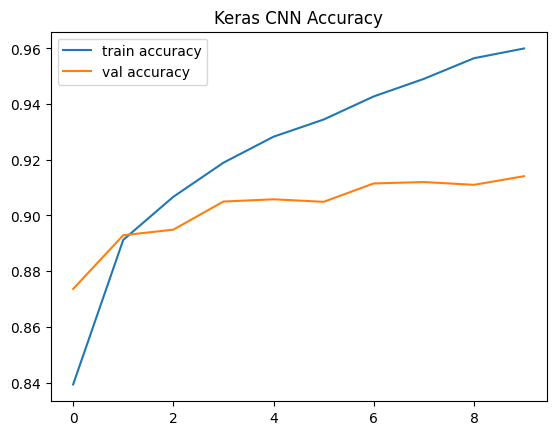

In [3]:
# === 1. Import libraries ===
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# === 2. Load the Fashion MNIST dataset ===
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# === 3. Normalize the data ===
x_train = x_train / 255.0
x_test = x_test / 255.0

# === 4. Reshape to include the channel dimension ===
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# === 5. Build the CNN model ===
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === 6. Compile the model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === 7. Train the model ===
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# === 8. Evaluate the model ===
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

# === 9. Plot accuracy and loss ===
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("Keras CNN Accuracy")
plt.show()


Part 2 CNN using PyTorch

In [4]:
# === 1. Import libraries ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# === 2. Define transformations ===
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# === 3. Load the dataset ===
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 26.4MB/s]


In [5]:
# === 4. class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2)

        # Dummy forward pass to compute flattened size
        x = torch.randn(1, 1, 28, 28)
        x = self.pool(F.relu(self.conv2(F.relu(self.conv1(x)))))
        self.num_features = x.view(1, -1).size(1)

        self.fc1 = nn.Linear(self.num_features, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# === 5. Initialize model, loss, optimizer ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# === 6. Train the model ===
for epoch in range(10):
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(trainloader):.4f}")

Epoch [1/10], Loss: 0.3695
Epoch [2/10], Loss: 0.2249
Epoch [3/10], Loss: 0.1679
Epoch [4/10], Loss: 0.1276
Epoch [5/10], Loss: 0.0913
Epoch [6/10], Loss: 0.0642
Epoch [7/10], Loss: 0.0452
Epoch [8/10], Loss: 0.0316
Epoch [9/10], Loss: 0.0302
Epoch [10/10], Loss: 0.0218


In [7]:
# === 7. Evaluate the model ===
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\nTest Accuracy: {100 * correct / total:.2f}%")



Test Accuracy: 92.49%
